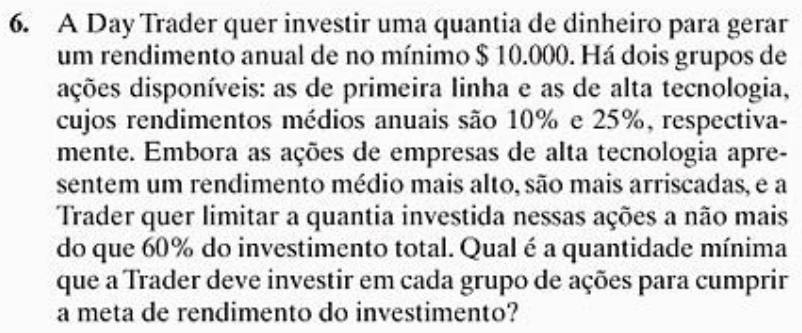

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Investimento_Minimo_DayTrader')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Grupos de ações para referência
grupos_acoes = ['primeira_linha', 'alta_tecnologia']

# Dados financeiros
meta_rendimento_anual = 10000
taxa_rendimento = {'primeira_linha': 0.10, 'alta_tecnologia': 0.25}

# Regra de aversão ao risco
limite_risco_alta_tec_perc = 0.60 # Máximo de 60% do total em alta tecnologia

In [4]:
# 1. Variáveis de Decisão
# Valor ($) a ser investido em cada grupo de ações
valor_investido = model.continuous_var_dict(grupos_acoes, name='Valor')


# 2. Função Objetivo
# Minimizar o investimento total necessário
expressao_investimento = (valor_investido[g] for g in grupos_acoes)
investimento_total = model.sum(expressao_investimento)
model.minimize(investimento_total)


# 3. Restrições

# Restrição 1: Meta de Rendimento Anual
# O retorno combinado dos investimentos deve ser no mínimo $10.000.
expressao_rendimento = (taxa_rendimento[g] * valor_investido[g] for g in grupos_acoes)
rendimento_total = model.sum(expressao_rendimento)
restr_meta_rendimento_logica = rendimento_total >= meta_rendimento_anual
model.add_constraint(restr_meta_rendimento_logica, ctname='meta_rendimento')

# Restrição 2: Limite de Risco
# O investimento em alta tecnologia (A) não pode ser mais que 60% do total (P+A).
# A <= 0.6 * (P + A)  =>  A <= 0.6*P + 0.6*A  =>  0.4*A - 0.6*P <= 0
restr_risco_logica = (
    0.4 * valor_investido['alta_tecnologia'] - 0.6 * valor_investido['primeira_linha'] <= 0
)
model.add_constraint(restr_risco_logica, ctname='limite_risco_alta_tec')

docplex.mp.LinearConstraint[limite_risco_alta_tec](-0.600Valor_primeira_linha+0.400Valor_alta_tecnologia,LE,0)

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =         40000.000000

------ SOLUÇÃO ÓTIMA ------

solution for: Investimento_Minimo_DayTrader
objective: 52631.6
status: OPTIMAL_SOLUTION(2)
Valor_primeira_linha=21052.632
Valor_alta_tecnologia=31578.947

